# 1、数据整合

In [61]:
import os
import pandas as pd
import glob

def generate_unique_filename(base_name, extension):
    """生成唯一的文件名"""
    counter = 1
    while True:
        filename = f"{base_name}_{counter}{extension}"
        if not os.path.exists(filename):
            return filename
        counter += 1

# 设置数据目录路径
data_dir = "../collected_data"
all_data = []

# 遍历所有label目录
print("开始处理数据文件...")
for label_dir in os.listdir(data_dir):
    if label_dir.startswith('label_'):
        glove_file = os.path.join(data_dir, label_dir, 'glove_data.csv')
        
        if os.path.exists(glove_file):
            print(f"正在读取: {glove_file}")
            try:
                df = pd.read_csv(glove_file)
                # 删除IMU相关列
                df = df.drop(['imu1', 'imu2', 'imu3'], axis=1)
                all_data.append(df)
            except Exception as e:
                print(f"处理文件 {glove_file} 时出错: {str(e)}")

# 合并所有数据框
if all_data:
    combined_data = pd.concat(all_data, ignore_index=True)
    
    # 生成不重复的文件名
    output_file = generate_unique_filename("data_train", ".csv")
    
    # 保存合并后的数据，设置float_format保持精度
    combined_data.to_csv(output_file, index=False, float_format='%.6f')
    print(f"\n数据已合并并保存到: {output_file}")
    print(f"总行数: {len(combined_data)}")
    print("保留的列:", list(combined_data.columns))
else:
    print("未找到任何数据文件")

开始处理数据文件...
正在读取: ../collected_data\label_1_5\glove_data.csv
正在读取: ../collected_data\label_1_6\glove_data.csv
正在读取: ../collected_data\label_2_5\glove_data.csv
正在读取: ../collected_data\label_2_6\glove_data.csv
正在读取: ../collected_data\label_3_5\glove_data.csv
正在读取: ../collected_data\label_3_6\glove_data.csv
正在读取: ../collected_data\label_4_5\glove_data.csv
正在读取: ../collected_data\label_4_6\glove_data.csv
正在读取: ../collected_data\label_5_5\glove_data.csv
正在读取: ../collected_data\label_5_6\glove_data.csv
正在读取: ../collected_data\label_6_5\glove_data.csv
正在读取: ../collected_data\label_6_6\glove_data.csv
正在读取: ../collected_data\label_8_5\glove_data.csv
正在读取: ../collected_data\label_8_6\glove_data.csv

数据已合并并保存到: data_train_1.csv
总行数: 24445
保留的列: ['timestamp', 'bend1', 'bend2', 'bend3', 'bend4', 'bend5', 'stress1', 'stress2', 'stress3', 'label']


# 2、数据预处理

C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 221

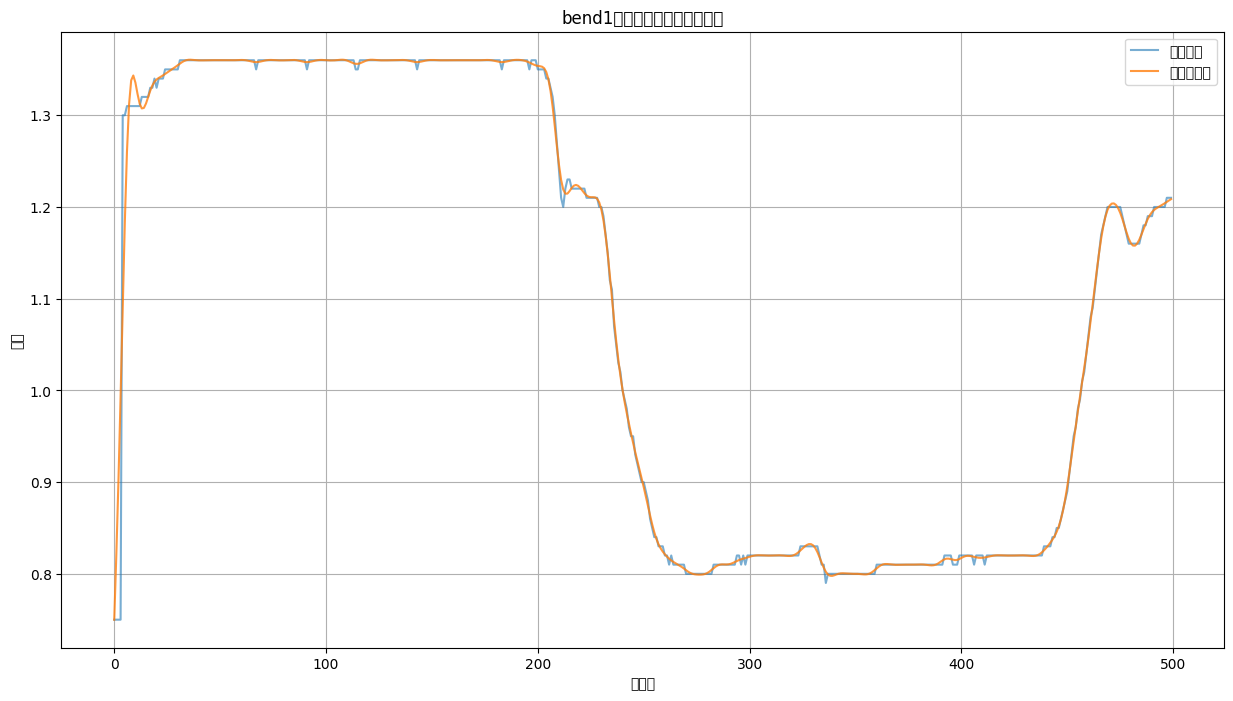

滤波后的数据已保存到: data_train_1_filtered.csv

滤波前后数据统计对比：

bend1传感器:
原始数据统计:
count    17623.000000
mean         1.049194
std          0.223358
min          0.690000
25%          0.830000
50%          1.020000
75%          1.320000
max          1.360000
Name: bend1, dtype: float64

滤波后数据统计:
count    17623.000000
mean         1.049203
std          0.223205
min          0.695530
25%          0.830460
50%          1.017022
75%          1.320000
max          1.392157
Name: bend1, dtype: float64

bend2传感器:
原始数据统计:
count    17623.000000
mean         1.112603
std          0.297827
min          0.660000
25%          0.840000
50%          0.940000
75%          1.450000
max          1.520000
Name: bend2, dtype: float64

滤波后数据统计:
count    17623.000000
mean         1.112612
std          0.297586
min          0.661338
25%          0.838504
50%          0.940012
75%          1.448051
max          1.562068
Name: bend2, dtype: float64

bend3传感器:
原始数据统计:
count    17623.000000
mean         0.989716
std         

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('data_train_1.csv')  # 确保使用正确的文件名

# 定义低通滤波器参数
fs = 100  # 采样频率（根据实际数据采集频率调整）
cutoff = 50  # 截止频率（根据需要调整）
order = 4  # 滤波器阶数

# 设计滤波器
nyquist = fs / 2
normalized_cutoff = cutoff / nyquist
b, a = signal.butter(order, normalized_cutoff, btype='low', analog=False)

# 需要滤波的列名
columns_to_filter = ['bend1', 'bend2', 'bend3', 'bend4', 'bend5', 
                    'stress1', 'stress2', 'stress3']

# 对每列数据进行滤波
filtered_data = df.copy()
for col in columns_to_filter:
    filtered_data[col] = signal.filtfilt(b, a, df[col])

# 可视化对比（选择第一个传感器数据作为示例）
plt.figure(figsize=(15, 8))
plt.plot(df['bend1'].iloc[0:500], label='原始数据', alpha=0.6)
plt.plot(filtered_data['bend1'].iloc[0:500], label='滤波后数据', alpha=0.8)
plt.title('bend1传感器数据滤波前后对比')
plt.xlabel('采样点')
plt.ylabel('幅值')
plt.legend()
plt.grid(True)
plt.show()

# 保存滤波后的数据
output_filename = 'data_train_1_filtered.csv'
filtered_data.to_csv(output_filename, index=False)
print(f"滤波后的数据已保存到: {output_filename}")

# 打印滤波前后的统计信息
print("\n滤波前后数据统计对比：")
for col in columns_to_filter:
    print(f"\n{col}传感器:")
    print("原始数据统计:")
    print(df[col].describe())
    print("\n滤波后数据统计:")
    print(filtered_data[col].describe())

# 3、活动段分割


标签 1 处理完成:
原始样本数: 3422
活动段样本数: 3035
生成窗口数: 606

标签 2 处理完成:
原始样本数: 3939
活动段样本数: 3473
生成窗口数: 693

标签 3 处理完成:
原始样本数: 2735
活动段样本数: 2197
生成窗口数: 438

标签 4 处理完成:
原始样本数: 2849
活动段样本数: 2412
生成窗口数: 481

标签 5 处理完成:
原始样本数: 3144
活动段样本数: 2507
生成窗口数: 500

标签 6 处理完成:
原始样本数: 3998
活动段样本数: 3143
生成窗口数: 627

标签 8 处理完成:
原始样本数: 4358
活动段样本数: 3520
生成窗口数: 703

数据分割完成:
特征形状: (4048, 10, 8)
标签形状: (4048,)


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 200

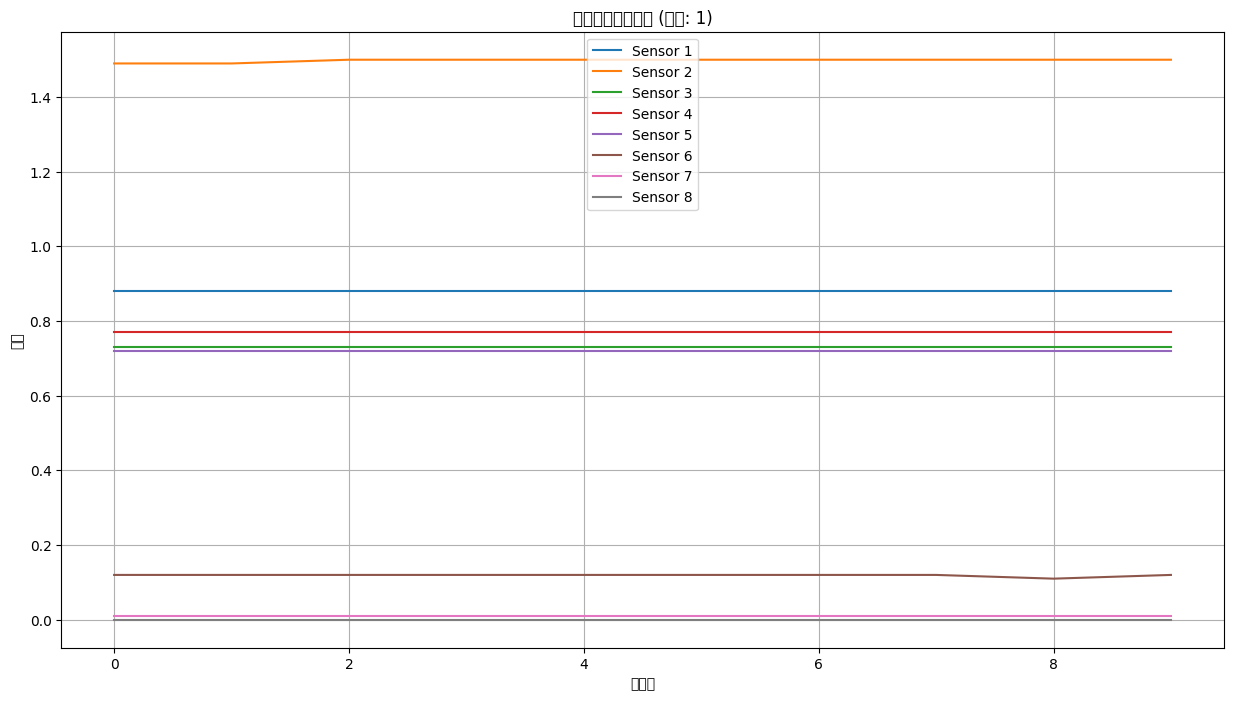

In [62]:
import numpy as np
import pandas as pd

class GloveDataSegmentation:
    def __init__(self, window_size=10, overlap=0.5, energy_threshold=3.0):
        """初始化分割参数
        
        Args:
            window_size (int): 滑动窗口大小
            overlap (float): 窗口重叠比例 (0-1)
            energy_threshold (float): 能量阈值系数
        """
        self.window_size = window_size
        self.overlap = overlap
        self.stride = int(window_size * (1 - overlap))
        self.energy_threshold = energy_threshold
        
    def sliding_window(self, data, label):
        """使用滑动窗口分割数据"""
        windows = []
        labels = []
        
        n_samples = len(data)
        n_slides = (n_samples - self.window_size) // self.stride + 1
        
        for i in range(n_slides):
            start = i * self.stride
            end = start + self.window_size
            
            if end <= n_samples:
                window = data[start:end]
                windows.append(window)
                labels.append(label)
                
        return np.array(windows), np.array(labels)

    def calculate_energy(self, data):
        """修改能量计算方法以适应较小窗口"""
        # 调整权重
        bend_energy = np.sum(np.square(data[:, :5]), axis=1)
        stress_energy = np.sum(np.square(data[:, 5:8]), axis=1)
        
        # 增加弯曲传感器权重
        total_energy = 0.7 * bend_energy + 0.3 * stress_energy
        return total_energy
    
    def detect_activity(self, data):
        """降低活动检测阈值"""
        energy = self.calculate_energy(data)
        mean_energy = np.mean(energy)
        std_energy = np.std(energy)
        
        # 使用固定阈值3.0
        activity_threshold = 3.0
        return energy > activity_threshold
    
    def segment_signals(self, data_path='data_train_1.csv'):
        """分割活动段
        
        Args:
            data_path: 预处理后的数据文件路径
        """
        try:
            # 读取预处理后的数据
            df = pd.read_csv(data_path)
            
            # 提取传感器数据列
            sensor_cols = ['bend1', 'bend2', 'bend3', 'bend4', 'bend5',
                         'stress1', 'stress2', 'stress3']
            
            all_windows = []
            all_labels = []
            
            # 对每个标签进行处理
            for label in df['label'].unique():
                # 提取当前标签的数据
                label_data = df[df['label'] == label][sensor_cols].values
                
                # 检测活动段
                activity_mask = self.detect_activity(label_data)
                active_data = label_data[activity_mask]
                
                if len(active_data) >= self.window_size:
                    # 对活动段进行滑动窗口分割
                    windows, labels = self.sliding_window(active_data, label)
                    all_windows.extend(windows)
                    all_labels.extend(labels)
                
                print(f"\n标签 {label} 处理完成:")
                print(f"原始样本数: {len(label_data)}")
                print(f"活动段样本数: {len(active_data)}")
                print(f"生成窗口数: {len(windows) if 'windows' in locals() else 0}")
            
            # 转换为numpy数组
            X = np.array(all_windows)
            y = np.array(all_labels)
            
            # 保存分割后的数据
            np.save('segmented_X.npy', X)
            np.save('segmented_y.npy', y)
            
            print("\n数据分割完成:")
            print(f"特征形状: {X.shape}")
            print(f"标签形状: {y.shape}")
            
            return X, y
            
        except Exception as e:
            print(f"分割数据时出错: {str(e)}")
            return None, None

# 使用新参数创建分割器
segmenter = GloveDataSegmentation(
    window_size=10,    # 使用10帧窗口
    overlap=0.5,       # 50%重叠
    energy_threshold=3.0  # 降低阈值
)

# 执行分割
X, y = segmenter.segment_signals()

# 可视化第一个窗口的数据
if X is not None and len(X) > 0:
    plt.figure(figsize=(15, 8))
    for i in range(8):
        plt.plot(X[0, :, i], label=f'Sensor {i+1}')
    plt.title(f'第一个窗口的数据 (标签: {y[0]})')
    plt.xlabel('采样点')
    plt.ylabel('幅值')
    plt.legend()
    plt.grid(True)
    plt.show()

# 4、特征提取

In [63]:
import numpy as np
from scipy import signal

class GloveFeatureExtractor:
    def __init__(self):
        """初始化特征提取器"""
        # 8个通道(5个弯曲+3个压力)，每个通道4个特征
        self.n_features = 8 * 4
        self.feature_names = self._generate_feature_names()
        self.eps = 1e-10  # 用于数值稳定性
        
    def _generate_feature_names(self):
        """生成特征名称列表"""
        sensors = {
            'bend': 5,    # 5个弯曲传感器
            'stress': 3,  # 3个压力传感器
        }
        
        features = ['mean', 'max', 'change_rate', 'std']
        names = []
        
        for sensor_type, count in sensors.items():
            for i in range(1, count + 1):
                for feature in features:
                    names.append(f'{sensor_type}{i}_{feature}')
                    
        return names
    
    def extract_bend_features(self, data):
        """弯曲传感器特征提取
        
        Args:
            data: 单个传感器的时间序列数据
        Returns:
            list: [均值, 最大值, 变化率, 标准差]
        """
        features = [
            np.mean(data),                    # 平均弯曲程度
            np.max(data),                     # 最大弯曲角度
            np.mean(np.abs(np.diff(data))),   # 平均弯曲变化率
            np.std(data)                      # 弯曲波动程度
        ]
        return features
    
    def extract_stress_features(self, data):
        """压力传感器特征提取
        
        Args:
            data: 单个传感器的时间序列数据
        Returns:
            list: [均值, 最大值, 变化率, 标准差]
        """
        features = [
            np.mean(data),                    # 平均压力值
            np.max(data),                     # 最大压力值
            np.sum(np.abs(np.diff(data))),    # 压力累积变化
            np.std(data)                      # 压力波动程度
        ]
        return features
    
    
    def extract_features(self, window):
        """从一个时间窗口提取所有特征
        
        Args:
            window: shape (window_size, n_channels)的数据窗口
        Returns:
            np.array: 特征向量
        """
        try:
            # 数据预处理
            window = np.array(window, dtype=np.float64)
            window = signal.medfilt(window, kernel_size=3)
            
            features = []
            
            # 处理弯曲传感器数据 (0-4)
            for i in range(5):
                bend_data = window[:, i]
                if np.std(bend_data) < self.eps:
                    features.extend([0] * 4)
                else:
                    features.extend(self.extract_bend_features(bend_data))
            
            # 处理压力传感器数据 (5-7)
            for i in range(5, 8):
                stress_data = window[:, i]
                if np.std(stress_data) < self.eps:
                    features.extend([0] * 4)
                else:
                    features.extend(self.extract_stress_features(stress_data))
            
            return np.array(features)
            
        except Exception as e:
            print(f"特征提取错误: {str(e)}")
            return None

# 使用示例
def extract_features_from_segments(X, y):
    """从分段数据中提取特征
    
    Args:
        X: shape (n_segments, window_size, n_channels) 的分段数据
        y: shape (n_segments,) 的标签数据
    Returns:
        X_features: shape (n_segments, n_features) 的特征矩阵
        y: 对应的标签
    """
    extractor = GloveFeatureExtractor()
    X_features = []
    
    for i, segment in enumerate(X):
        features = extractor.extract_features(segment)
        if features is not None:
            X_features.append(features)
        else:
            print(f"警告：段 {i} 特征提取失败")
    
    return np.array(X_features), y[:len(X_features)]

# 加载分段数据
X = np.load('segmented_X.npy')
y = np.load('segmented_y.npy')

# 提取特征
X_features, y = extract_features_from_segments(X, y)

print(f"特征矩阵形状: {X_features.shape}")
print(f"标签形状: {y.shape}")
print(f"\n特征名称:")
extractor = GloveFeatureExtractor()
for i, name in enumerate(extractor.feature_names):
    print(f"{i+1}. {name}")

特征矩阵形状: (4048, 32)
标签形状: (4048,)

特征名称:
1. bend1_mean
2. bend1_max
3. bend1_change_rate
4. bend1_std
5. bend2_mean
6. bend2_max
7. bend2_change_rate
8. bend2_std
9. bend3_mean
10. bend3_max
11. bend3_change_rate
12. bend3_std
13. bend4_mean
14. bend4_max
15. bend4_change_rate
16. bend4_std
17. bend5_mean
18. bend5_max
19. bend5_change_rate
20. bend5_std
21. stress1_mean
22. stress1_max
23. stress1_change_rate
24. stress1_std
25. stress2_mean
26. stress2_max
27. stress2_change_rate
28. stress2_std
29. stress3_mean
30. stress3_max
31. stress3_change_rate
32. stress3_std


# 5、模型训练


模型性能报告:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       139
           3       0.99      1.00      0.99        88
           4       0.99      0.99      0.99        96
           5       1.00      0.99      0.99       100
           6       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       141

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 281

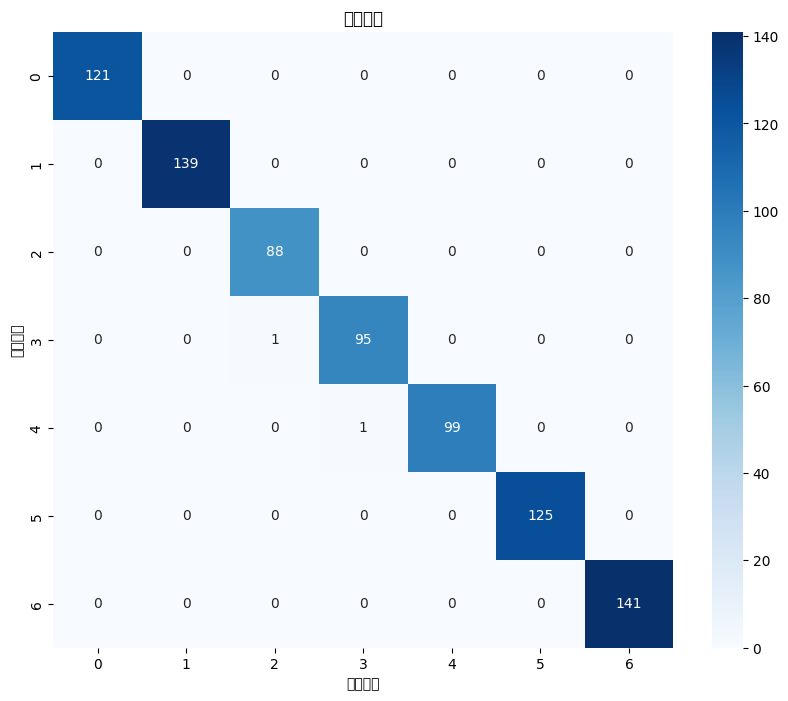

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23440\4206683897.py:65: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23440\4206683897.py:65: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23440\4206683897.py:65: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23440\4206683897.py:65: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23440\4206683897.py:65: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23440\4206683897.py:65: UserWarning: Glyph 25490 (\N{CJK UNIFIED IDEOGRAPH-6392}

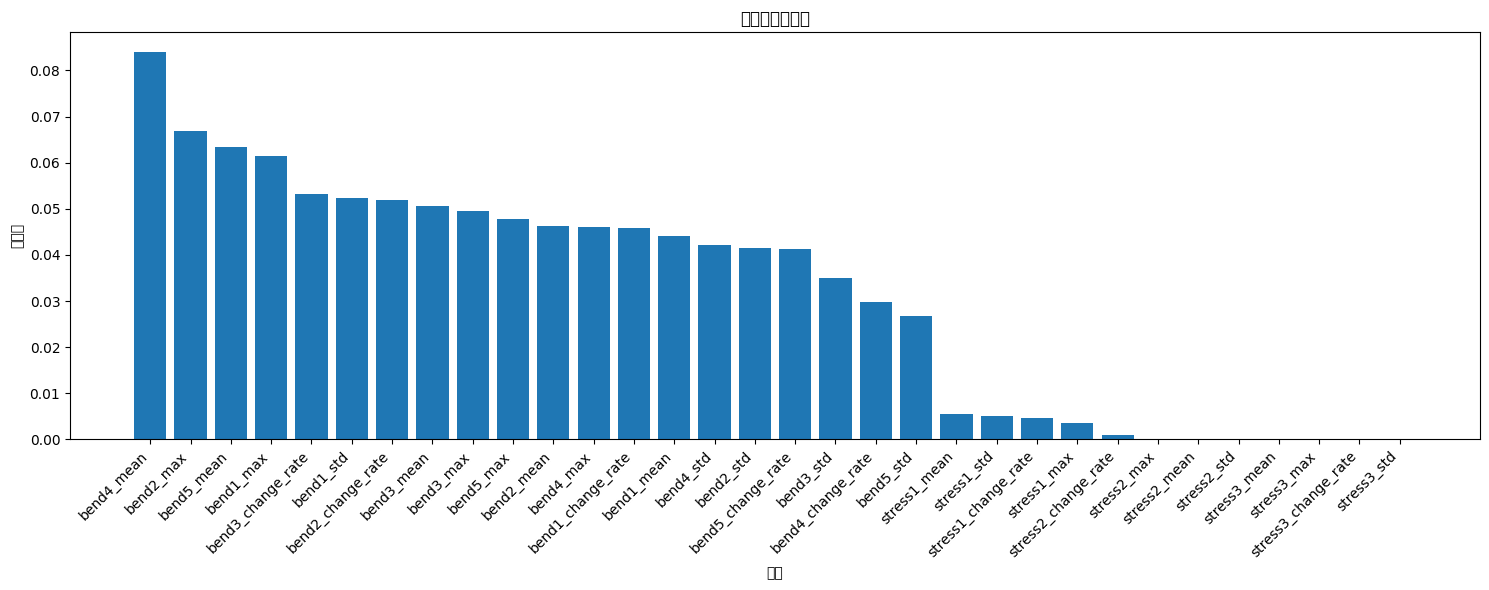


模型已保存为: random_forest_model_20250218_155607.pkl

训练集准确率: 0.9994
测试集准确率: 0.9975

预测示例:
预测标签: 8
预测概率: [0. 0. 0. 0. 0. 0. 1.]


In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

# 加载特征数据
X = X_features  # 使用之前提取的特征
y = y          # 使用之前的标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 创建并训练随机森林模型
rf_model = RandomForestClassifier(
    n_estimators=100,    # 决策树数量
    max_depth=10,        # 树的最大深度
    min_samples_split=5, # 分裂节点所需的最小样本数
    random_state=42
)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 打印模型性能报告
print("\n模型性能报告:")
print(classification_report(y_test, y_pred))

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()

# 计算并可视化特征重要性
feature_importance = rf_model.feature_importances_
extractor = GloveFeatureExtractor()
feature_names = extractor.feature_names

# 创建特征重要性DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})
importance_df = importance_df.sort_values('importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(15, 6))
plt.bar(range(len(feature_importance)), importance_df['importance'])
plt.xticks(range(len(feature_importance)), importance_df['feature'], rotation=45, ha='right')
plt.title('特征重要性排序')
plt.xlabel('特征')
plt.ylabel('重要性')
plt.tight_layout()
plt.show()

# 保存模型为pkl格式
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'random_forest_model_{timestamp}.pkl'

# 使用pickle保存模型
with open(model_filename, 'wb') as f:
    pickle.dump(rf_model, f)
print(f"\n模型已保存为: {model_filename}")

# 输出模型准确率
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"\n训练集准确率: {train_accuracy:.4f}")
print(f"测试集准确率: {test_accuracy:.4f}")

# 对新数据进行预测示例
def predict_gesture(model, new_features):
    """使用训练好的模型预测手势"""
    prediction = model.predict([new_features])
    probabilities = model.predict_proba([new_features])
    return prediction[0], probabilities[0]

# 使用测试集中的一个样本作为示例
sample_features = X_test[0]
pred_label, pred_probs = predict_gesture(rf_model, sample_features)
print(f"\n预测示例:")
print(f"预测标签: {pred_label}")
print(f"预测概率: {pred_probs}")